<a href="https://www.kaggle.com/code/vinay2003/notebook7808489cb4?scriptVersionId=154688457" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import os
for dirname,_,filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_2.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_7.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_5.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_10.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_1.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_8.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_3.JPG
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_6.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/capsicum/Image_9.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/Image_4.jpg
/kaggle/input/fruit-and-vegetable-image-recognition/validation/sweetcorn/I

In [5]:

train_dir = "/kaggle/input/fruit-and-vegetable-image-recognition/train"
valid_dir = "/kaggle/input/fruit-and-vegetable-image-recognition/validation"
test_dir = "/kaggle/input/fruit-and-vegetable-image-recognition/test"
num_classes = 36

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train=ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [8]:
test=ImageDataGenerator(rescale=1./255)

In [9]:
val=ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

Found 3115 images belonging to 36 classes.


In [11]:
test_generator = test.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

Found 359 images belonging to 36 classes.


In [12]:
val_generator = val.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

Found 351 images belonging to 36 classes.


In [13]:
from tensorflow.keras.applications import MobileNetV2

In [14]:
mod=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
for layer in mod.layers:
    layer.trainable=False

9406464/9406464 [==============================] - 1s 0us/step


In [15]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LeakyReLU

In [16]:
x = mod.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation=LeakyReLU(alpha=0.3))(x)
predictions = Dense(num_classes, activation="softmax")(x)

In [17]:
model = Model(inputs=mod.input, outputs=predictions)

In [18]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [19]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='auto')

In [20]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=20,callbacks=[early_stopping]
)

Epoch 1/20
 9/97 [=>............................] - ETA: 2:40 - loss: 3.1531 - accuracy: 0.2604

/opt/conda/lib/python3.10/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


97/97 [==============================] - 206s 2s/step - loss: 1.2549 - accuracy: 0.6383 - val_loss: 0.2954 - val_accuracy: 0.9125
Epoch 2/20
97/97 [==============================] - 170s 2s/step - loss: 0.5586 - accuracy: 0.8268 - val_loss: 0.2422 - val_accuracy: 0.9219
Epoch 3/20
97/97 [==============================] - 171s 2s/step - loss: 0.3581 - accuracy: 0.8806 - val_loss: 0.2350 - val_accuracy: 0.9312
Epoch 4/20
97/97 [==============================] - 167s 2s/step - loss: 0.2535 - accuracy: 0.9085 - val_loss: 0.2889 - val_accuracy: 0.9062
Epoch 5/20
97/97 [==============================] - 167s 2s/step - loss: 0.2281 - accuracy: 0.9238 - val_loss: 0.2953 - val_accuracy: 0.9156


In [21]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.254914,0.638339,0.295395,0.912500
1,0.558624,0.826792,0.242154,0.921875
2,0.358104,0.880636,0.235048,0.931250
3,0.253465,0.908531,0.288917,0.906250
4,0.228079,0.923776,0.295336,0.915625


In [22]:
import matplotlib.pyplot as plt

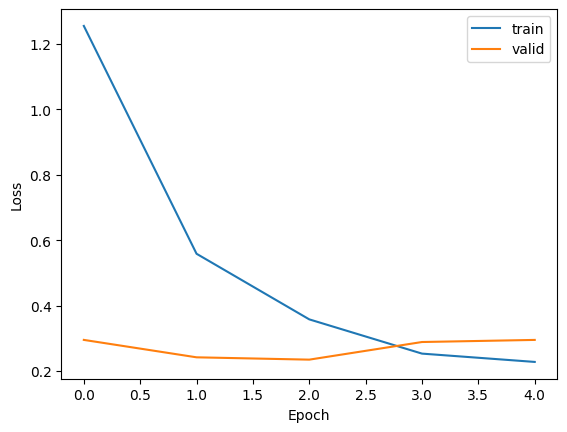

In [23]:
plt.figure()
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "valid"])
plt.show()

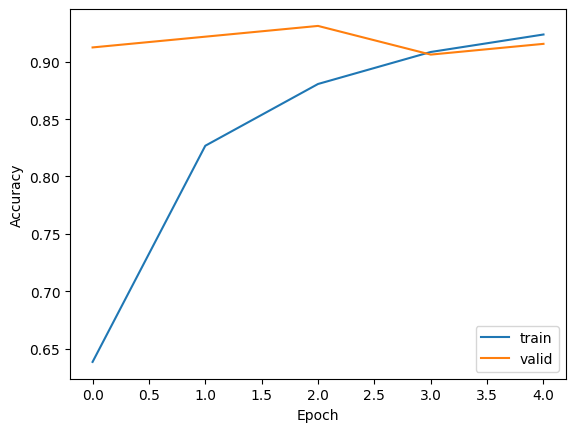

In [24]:
plt.figure()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "valid"])
plt.show()

In [25]:
preds = model.predict(test_generator)

12/12 [==============================] - 21s 2s/step


In [26]:
y_pred = np.argmax(preds, axis=1)

In [27]:
for k, v in test_generator.class_indices.items():
    print(v, ":", k)

0 : apple
1 : banana
2 : beetroot
3 : bell pepper
4 : cabbage
5 : capsicum
6 : carrot
7 : cauliflower
8 : chilli pepper
9 : corn
10 : cucumber
11 : eggplant
12 : garlic
13 : ginger
14 : grapes
15 : jalepeno
16 : kiwi
17 : lemon
18 : lettuce
19 : mango
20 : onion
21 : orange
22 : paprika
23 : pear
24 : peas
25 : pineapple
26 : pomegranate
27 : potato
28 : raddish
29 : soy beans
30 : spinach
31 : sweetcorn
32 : sweetpotato
33 : tomato
34 : turnip
35 : watermelon


In [28]:
pred_classes = {
    0 : "apple",
    1 : "banana",
    2 : "beetroot",
    3 : "bell pepper",
    4 : "cabbage",
    5 : "capsicum",
    6 : "carrot",
    7 : "cauliflower",
    8 : "chilli pepper",
    9 : "corn",
    10 : "cucumber",
    11 : "eggplant",
    12 : "garlic",
    13 : "ginger",
    14 : "grapes",
    15 : "jalepeno",
    16 : "kiwi",
    17 : "lemon",
    18 : "lettuce",
    19 : "mango",
    20 : "onion",
    21 : "orange",
    22 : "paprika",
    23 : "pear",
    24 : "peas",
    25 : "pineapple",
    26 : "pomegranate",
    27 : "potato",
    28 : "raddish",
    29 : "soy beans",
       30 : "spinach",
    31 : "sweetcorn",
    32 : "sweetpotato",
    33 : "tomato",
    34 : "turnip",
    35 : "watermelon"
}

In [29]:
y_pred = list(map(lambda x: pred_classes[x], y_pred))

In [30]:
y_test = list(map(lambda x: pred_classes[x], test_generator.classes))

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

               precision    recall  f1-score   support

        apple       0.70      1.00      0.82         7
       banana       0.78      1.00      0.88         7
     beetroot       1.00      1.00      1.00        10
  bell pepper       1.00      0.77      0.87        13
      cabbage       1.00      1.00      1.00        10
     capsicum       0.70      1.00      0.82         7
       carrot       0.90      1.00      0.95         9
  cauliflower       1.00      1.00      1.00        10
chilli pepper       1.00      0.91      0.95        11
         corn       1.00      0.50      0.67        20
     cucumber       1.00      1.00      1.00        10
     eggplant       1.00      1.00      1.00        10
       garlic       1.00      1.00      1.00        10
       ginger       1.00      0.91      0.95        11
       grapes       1.00      1.00      1.00        10
     jalepeno       1.00      1.00      1.00        10
         kiwi       1.00      1.00      1.00        10
        l

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
model.save('check.sav')

In [35]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
loaded_model = load_model('check.sav')

# Path to the image you want to test
test_image_path = '/kaggle/input/fruit-and-vegetable-image-recognition/test/cauliflower/Image_10.jpg'

# Load and preprocess the test image
img = image.load_img(test_image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the pixel values to be between 0 and 1

# Make predictions
predictions = loaded_model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions)

# Map the predicted class to the corresponding label
pred_classes = {
     0 : "apple",
    1 : "banana",
    2 : "beetroot",
    3 : "bell pepper",
    4 : "cabbage",
    5 : "capsicum",
    6 : "carrot",
    7 : "cauliflower",
    8 : "chilli pepper",
    9 : "corn",
    10 : "cucumber",
    11 : "eggplant",
    12 : "garlic",
    13 : "ginger",
    14 : "grapes",
    15 : "jalepeno",
    16 : "kiwi",
    17 : "lemon",
    18 : "lettuce",
    19 : "mango",
    20 : "onion",
    21 : "orange",
    22 : "paprika",
    23 : "pear",
    24 : "peas",
    25 : "pineapple",
    26 : "pomegranate",
    27 : "potato",
    28 : "raddish",
    29 : "soy beans",
       30 : "spinach",
    31 : "sweetcorn",
    32 : "sweetpotato",
    33 : "tomato",
    34 : "turnip",
    35 : "watermelon"
}

predicted_label = pred_classes[predicted_class]

# Print the result
print(f"The predicted label is: {predicted_label}")


1/1 [==============================] - 1s 907ms/step
The predicted label is: cauliflower
